In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop('sales', axis=1)

In [5]:
y = df['sales']

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
polynomial_converter = PolynomialFeatures(degree=3, include_bias=False)

In [8]:
polynomial_converter.fit(X)

PolynomialFeatures(degree=3, include_bias=False)

In [9]:
poly_features = polynomial_converter.transform(X)

In [10]:
poly_features

array([[2.30100000e+02, 3.78000000e+01, 6.92000000e+01, ...,
        9.88757280e+04, 1.81010592e+05, 3.31373888e+05],
       [4.45000000e+01, 3.93000000e+01, 4.51000000e+01, ...,
        6.96564990e+04, 7.99365930e+04, 9.17338510e+04],
       [1.72000000e+01, 4.59000000e+01, 6.93000000e+01, ...,
        1.46001933e+05, 2.20434291e+05, 3.32812557e+05],
       ...,
       [1.77000000e+02, 9.30000000e+00, 6.40000000e+00, ...,
        5.53536000e+02, 3.80928000e+02, 2.62144000e+02],
       [2.83600000e+02, 4.20000000e+01, 6.62000000e+01, ...,
        1.16776800e+05, 1.84062480e+05, 2.90117528e+05],
       [2.32100000e+02, 8.60000000e+00, 8.70000000e+00, ...,
        6.43452000e+02, 6.50934000e+02, 6.58503000e+02]])

In [11]:
poly_features.shape

(200, 19)

In [12]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [13]:
poly_features[0]

array([2.30100000e+02, 3.78000000e+01, 6.92000000e+01, 5.29460100e+04,
       8.69778000e+03, 1.59229200e+04, 1.42884000e+03, 2.61576000e+03,
       4.78864000e+03, 1.21828769e+07, 2.00135918e+06, 3.66386389e+06,
       3.28776084e+05, 6.01886376e+05, 1.10186606e+06, 5.40101520e+04,
       9.88757280e+04, 1.81010592e+05, 3.31373888e+05])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# shift tab on train_test_split and copy example to ensure tuplr is unpacked correctly
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
X_train

array([[1.93200000e+02, 1.84000000e+01, 6.57000000e+01, ...,
        2.22433920e+04, 7.94234160e+04, 2.83593393e+05],
       [2.87600000e+02, 4.30000000e+01, 7.18000000e+01, ...,
        1.32758200e+05, 2.21675320e+05, 3.70146232e+05],
       [8.02000000e+01, 0.00000000e+00, 9.20000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 7.78688000e+02],
       ...,
       [2.39800000e+02, 4.10000000e+00, 3.69000000e+01, ...,
        6.20289000e+02, 5.58260100e+03, 5.02434090e+04],
       [2.14700000e+02, 2.40000000e+01, 4.00000000e+00, ...,
        2.30400000e+03, 3.84000000e+02, 6.40000000e+01],
       [1.63300000e+02, 3.16000000e+01, 5.29000000e+01, ...,
        5.28238240e+04, 8.84297560e+04, 1.48035889e+05]])

In [18]:
model = LinearRegression(fit_intercept=True)

In [19]:
model.fit(X_train, y_train)

LinearRegression()

In [20]:
test_predictions = model.predict(X_test)

In [21]:
model.coef_

array([ 8.53149298e-02,  3.15462984e-02,  1.23498889e-02, -4.07708199e-04,
        1.54689254e-03, -3.34554048e-04, -1.79386062e-03,  8.77565922e-04,
        2.55725034e-04,  6.98711689e-07, -1.77801031e-06,  1.07084013e-06,
        2.65992287e-06, -1.70598730e-06,  2.83524393e-08,  2.22527764e-05,
       -8.29111519e-06, -3.65307549e-06, -1.92243475e-06])

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:
MAE = mean_absolute_error(y_test, test_predictions)

In [24]:
MSE = mean_squared_error(y_test, test_predictions)

In [25]:
RMSE = np.sqrt(MSE)

In [26]:
MAE

0.41275160854074733

In [27]:
RMSE

0.5803286825231682

In [28]:
# From Linear Regression MAE: 1.213 and RMSE 1.516
# The Polynomial Model is performing much better

In [29]:
model.coef_

array([ 8.53149298e-02,  3.15462984e-02,  1.23498889e-02, -4.07708199e-04,
        1.54689254e-03, -3.34554048e-04, -1.79386062e-03,  8.77565922e-04,
        2.55725034e-04,  6.98711689e-07, -1.77801031e-06,  1.07084013e-06,
        2.65992287e-06, -1.70598730e-06,  2.83524393e-08,  2.22527764e-05,
       -8.29111519e-06, -3.65307549e-06, -1.92243475e-06])

In [30]:
# To compare coef_'s 
poly_features[0]

array([2.30100000e+02, 3.78000000e+01, 6.92000000e+01, 5.29460100e+04,
       8.69778000e+03, 1.59229200e+04, 1.42884000e+03, 2.61576000e+03,
       4.78864000e+03, 1.21828769e+07, 2.00135918e+06, 3.66386389e+06,
       3.28776084e+05, 6.01886376e+05, 1.10186606e+06, 5.40101520e+04,
       9.88757280e+04, 1.81010592e+05, 3.31373888e+05])

In [31]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [32]:
# CREATE THE DIFFERENCE ORDER POLYNOMIAL# 
# split poly feature train/test
# fit on train
# store/save the rmse for boht the train and test
# plot results

In [33]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1, 10):
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    # shift tab on train_test_split and copy example to ensure tuplr is unpacked correctly
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)
    
    

In [34]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292231,
 0.43393443569020657,
 0.3517083688399348,
 0.2509342962728227,
 0.1994556133865361,
 5.418481285535737,
 0.1508621033579802,
 0.17175170448632276]

In [35]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757269019,
 0.5803286825231682,
 0.5077742656422755,
 2.575808121294812,
 4.263812349320766,
 1383.4052620420694,
 3733.4225752445113,
 95489.26452707677]

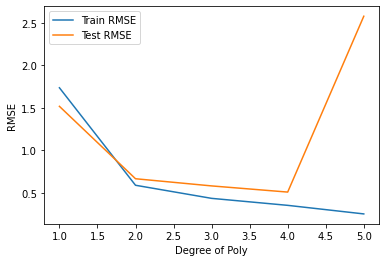

In [36]:
plt.plot(range(1,6), train_rmse_errors[:5], label='Train RMSE')
plt.plot(range(1,6), test_rmse_errors[:5], label='Test RMSE')

plt.xlabel('Degree of Poly')
plt.ylabel('RMSE')
plt.legend()

In [37]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [38]:
final_model = LinearRegression()

In [39]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X,y)

LinearRegression()

In [40]:
from joblib import dump, load

In [41]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [42]:
dump(final_poly_converter, 'final_converter.joblib')

['final_converter.joblib']

In [44]:
loaded_converter = load('final_converter.joblib')

In [52]:
loaded_model = load('final_poly_model.joblib')

In [53]:
campaign = [[149, 22, 12]]

In [54]:
transformed_data = loaded_converter.fit_transform(campaign)

In [55]:
loaded_model.predict(transformed_data)

array([14.64501014])